In [12]:
from __future__ import division, print_function
import os, glob, matplotlib.pyplot as plt, numpy as np, pandas as pd, math, re, itertools
%load_ext autoreload
%autoreload 2
np.set_printoptions(precision=6, suppress=True)
#%matplotlib notebook
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df, grad = {}, {}
duration, subjects, levels = [], [], []

for file in glob.glob(os.path.join('..', 'datadir', 'pilot', '*csv')):
    df_ = pd.read_csv(file, '\t')

    _, fname = os.path.split(file)
    fname, ext = fname.split('.')
    date, time, _, level, subj = fname.split('_')

    if subj not in subjects:
        subjects.append(subj)
    if level not in levels:
        levels.append(level)

    try:
        df[subj][level] = {}
        grad[subj][level] = {}
    except:
        df[subj] = {}
        df[subj][level] = {}
        grad[subj] = {}
        grad[subj][level] = {}

    for axis in ['T', 'X', 'Y']:
        for obj in ['gaze', 'ball', 'paddle']:
            df[subj][level][axis+obj] = df_[axis+obj]

    N_start, N_stop = 0, int((df[subj][level]['Tgaze'][len(df[subj][level]['Tgaze'])-1] - df[subj][level]['Tgaze'][0])*30)

    # find the moment when the ball collide with an element from below
    grad_, value_old, value_older = [], 0, 0
    for k, value in enumerate(np.gradient(df[subj][level]['Yball'])[N_start:N_stop]):        
        if value > 0 and  value_older < 0:
            grad_.append(k)
                
        value_older = value_old
        value_old = value
        
    grad[subj][level] = grad_

In [61]:
lvls_mix = [[[1, 1, 1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1, 1, 1, 1]],

        [[1, 1, 1, 1, 1, 1, 1, 5, 1],
         [1, 5, 1, 5, 1, 5, 5, 5, 5],
         [5, 5, 1, 5, 1, 5, 1, 5, 5],
         [5, 1, 1, 5, 0, 1, 5, 5, 1],
         [5, 1, 5, 1, 5, 1, 1, 1, 1],
         [5, 1, 1, 5, 5, 5, 5, 1, 1],
         [5, 1, 5, 1, 5, 5, 5, 1, 1],
         [5, 5, 5, 5, 1, 1, 1, 5, 1],
         [1, 1, 5, 5, 1, 5, 5, 1, 5]],

        [[5, 1, 5, 5, 1, 5, 1, 3, 1],
         [1, 3, 5, 3, 5, 3, 3, 3, 3],
         [3, 3, 1, 3, 1, 3, 5, 3, 3],
         [3, 1, 5, 3, 0, 1, 3, 3, 1],
         [3, 5, 3, 1, 3, 1, 1, 5, 1],
         [3, 1, 5, 3, 3, 3, 3, 1, 5],
         [3, 5, 3, 5, 3, 3, 3, 1, 5],
         [3, 3, 3, 3, 5, 5, 1, 3, 5],
         [1, 5, 3, 3, 5, 3, 3, 1, 3]],

        [[2, 2, 2, 2, 2, 2, 2, 4, 2],
         [2, 4, 2, 4, 2, 4, 4, 4, 4],
         [4, 4, 2, 4, 2, 4, 2, 4, 4],
         [4, 2, 2, 4, 0, 2, 4, 4, 2],
         [4, 2, 4, 2, 4, 2, 2, 2, 2],
         [4, 2, 2, 4, 4, 4, 4, 2, 2],
         [4, 2, 4, 2, 4, 4, 4, 2, 2],
         [4, 4, 4, 4, 2, 2, 2, 4, 2],
         [2, 2, 4, 4, 2, 4, 4, 2, 4]],

        [[2, 1, 2, 2, 1, 2, 1, 4, 1],
         [1, 3, 2, 4, 2, 4, 3, 4, 4],
         [3, 3, 1, 4, 1, 3, 2, 4, 3],
         [3, 1, 2, 3, 0, 1, 3, 3, 1],
         [4, 2, 3, 1, 4, 1, 1, 2, 1],
         [4, 1, 2, 4, 3, 3, 4, 1, 2],
         [3, 2, 3, 2, 3, 4, 3, 1, 2],
         [4, 3, 4, 4, 2, 2, 1, 3, 2],
         [1, 2, 4, 4, 2, 4, 4, 1, 3]],

        [[2, 1, 2, 2, 2, 2, 1, 5, 1],
         [1, 4, 3, 5, 3, 5, 3, 5, 4],
         [4, 3, 1, 5, 1, 3, 3, 4, 3],
         [4, 2, 3, 4, 0, 1, 4, 4, 2],
         [5, 2, 3, 1, 5, 1, 2, 3, 1],
         [5, 1, 3, 5, 4, 3, 5, 1, 2],
         [3, 2, 4, 2, 3, 5, 4, 1, 3],
         [5, 4, 4, 5, 3, 2, 1, 4, 2],
         [1, 2, 5, 5, 2, 4, 5, 1, 4]]]

lvls_mono = [[[0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0],
              [1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 1, 0, 0, 0, 1, 1, 1]],

             [[0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0],
              [2, 2, 2, 2, 2, 2, 2, 2, 2],
              [2, 2, 2, 2, 2, 2, 2, 2, 2],
              [2, 2, 2, 2, 2, 2, 2, 2, 2],
              [2, 2, 2, 2, 2, 2, 2, 2, 2],
              [2, 2, 2, 2, 2, 2, 2, 2, 2],
              [2, 2, 2, 2, 2, 2, 2, 2, 2],
              [2, 2, 2, 0, 0, 0, 2, 2, 2]],

             [[0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0],
              [3, 3, 3, 3, 3, 3, 3, 3, 3],
              [3, 3, 3, 3, 3, 3, 3, 3, 3],
              [3, 3, 3, 3, 3, 3, 3, 3, 3],
              [3, 3, 3, 3, 3, 3, 3, 3, 3],
              [3, 3, 3, 3, 3, 3, 3, 3, 3],
              [3, 3, 3, 3, 3, 3, 3, 3, 3],
              [3, 3, 3, 0, 0, 0, 3, 3, 3]],

             [[0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0],
              [4, 4, 4, 4, 4, 4, 4, 4, 4],
              [4, 4, 4, 4, 4, 4, 4, 4, 4],
              [4, 4, 4, 4, 4, 4, 4, 4, 4],
              [4, 4, 4, 4, 4, 4, 4, 4, 4],
              [4, 4, 4, 4, 4, 4, 4, 4, 4],
              [4, 4, 4, 4, 4, 4, 4, 4, 4],
              [4, 4, 4, 0, 0, 0, 4, 4, 4]],

             [[0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0],
              [5, 5, 5, 5, 5, 5, 5, 5, 5],
              [5, 5, 5, 5, 5, 5, 5, 5, 5],
              [5, 5, 5, 5, 5, 5, 5, 5, 5],
              [5, 5, 5, 5, 5, 5, 5, 5, 5],
              [5, 5, 5, 5, 5, 5, 5, 5, 5],
              [5, 5, 5, 5, 5, 5, 5, 5, 5],
              [5, 5, 5, 0, 0, 0, 5, 5, 5]],

             [[2, 1, 2, 2, 2, 2, 1, 5, 1],
              [1, 4, 3, 5, 3, 5, 3, 5, 4],
              [4, 3, 1, 5, 1, 3, 3, 4, 3],
              [4, 2, 3, 4, 0, 1, 4, 4, 2],
              [5, 2, 3, 1, 5, 1, 2, 3, 1],
              [5, 1, 3, 5, 4, 3, 5, 1, 2],
              [3, 2, 4, 2, 3, 5, 4, 1, 3],
              [5, 4, 4, 5, 3, 2, 1, 4, 2],
              [1, 2, 5, 5, 2, 4, 5, 1, 4],
              [0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0]]]

In [62]:
deltav = 10000
t_mean, lvl, t_sacc, p, t_mean_ = {}, {}, {}, {}, []
for subj in subjects:
    print("Subject: ", subj)
    t_mean[subj], lvl[subj], p[subj], t_sacc[subj] = [], [], [], []
    for level in levels:
        print(level)
        for v in grad[subj][level]:
            if df[subj][level]['Yball'][v] > 60:
                distance = (df[subj][level]['Ygaze'][v] - df[subj][level]['Yball'][v])**2 + (df[subj][level]['Xgaze'][v] - df[subj][level]['Xball'][v])**2
                distance = np.sqrt(distance)
                
                if distance < 200:
                    i = v-1
                    dist = (df[subj][level]['Ygaze'][v:v+deltav] - df[subj][level]['Yball'][v])**2 + (df[subj][level]['Xgaze'][v:v+deltav] - df[subj][level]['Xball'][v])**2
                    dist = np.sqrt(dist)
                    derivate = np.diff(dist)
                    if len(dist) != len(derivate):
                        derivate = np.append(derivate, np.nan)
                    for d in dist:
                        i += 1
                        if derivate[i-v] > 20:
                            
                            print(df[subj][level]['Xball'][v], df[subj][level]['Yball'][v])
                            if subj in ['juliette', 'elisa', 'maxime']:
                                for x, y in itertools.product(range(9), range(9)):
                                    if x*139 < df[subj][level]['Xball'][v] < 139 + x*139 and y*45 < df[subj][level]['Yball'][v] < 45 + y*45:
                                        p[subj].append(lvls_mix[int(re.findall(r'\d+', level)[0]) - 1][y][x])
                                        t_sacc[subj].append(df[subj][level]['Tgaze'][i]-df[subj][level]['Tgaze'][v])
                                        print(lvls_mix[int(re.findall(r'\d+', level)[0]) - 1][y][x])

                            if subj in ['remi', 'valerie', 'jade']:
                                for x, y in itertools.product(range(9), range(11)):
                                    if x*139 < df[subj][level]['Xball'][v] < 139 + x*139 and y*45 < df[subj][level]['Yball'][v] < 45 + y*45:
                                        p[subj].append(lvls_mono[int(re.findall(r'\d+', level)[0]) - 1][y][x])
                                        t_sacc[subj].append(df[subj][level]['Tgaze'][i]-df[subj][level]['Tgaze'][v])
                                        print(lvls_mono[int(re.findall(r'\d+', level)[0]) - 1][y][x])
                            break

        if np.std(t_sacc[subj]) < 10/10*np.mean(t_sacc[subj]):
            t_mean[subj].append(np.mean(t_sacc[subj]))
            t_mean_.append(np.mean(t_sacc[subj]))
            lvl[subj].append(re.findall(r'\d+', level)[0])
            print(np.mean(t_sacc[subj]), '+/-', np.std(t_sacc[subj]))
print(lvl)

Subject:  juliette
lvl1
515.0 438.0
370.0 436.0
121.0 434.0
382.0 392.0
1
367.0 348.0
1
220.0 440.0
203.0 343.0
1
342.0 303.0
1
193.0 258.0
1
383.0 118.0
1
107.0 386.0
1
59.0 345.0
1
104.0 304.0
1
226.0 207.0
1
200.0 165.0
1
476.0 342.0
1
624.0 432.0
631.0 387.0
1
71.0 253.0
1
778.0 390.0
1
1032.0 436.0
1027.0 393.0
1
1053.0 342.0
1
1197.0 439.0
1085.0 298.0
1
1061.0 258.0
1
1233.0 392.0
1
751.0 122.0
1
61.0 212.0
1
108.0 167.0
1
76.0 123.0
1
77.0 71.0
1
807.0 72.0
1
1180.0 346.0
1
1071.0 213.0
1
1042.0 118.0
1
1165.0 304.0
1
1231.0 255.0
1
0.298741971293 +/- 0.143926256016
lvl2
817.0 388.0
5
900.0 123.0
1
1080.0 252.0
1
1060.0 214.0
1
797.0 345.0
1
1164.0 393.0
5
838.0 135.0
821.0 297.0
5
737.0 122.0
5
756.0 75.0
5
586.0 284.0
5
609.0 251.0
5
684.0 161.0
0
1024.0 169.0
5
522.0 296.0
1
473.0 210.0
1
487.0 161.0
5
497.0 123.0
5
104.0 435.0
398.0 393.0
5
357.0 342.0
5
169.0 354.0
5
221.0 438.0
349.0 301.0
5
1227.0 343.0
1
1165.0 301.0
1
1213.0 252.0
1
420.0 253.0
5
341.0 211.0
5
102.0 38

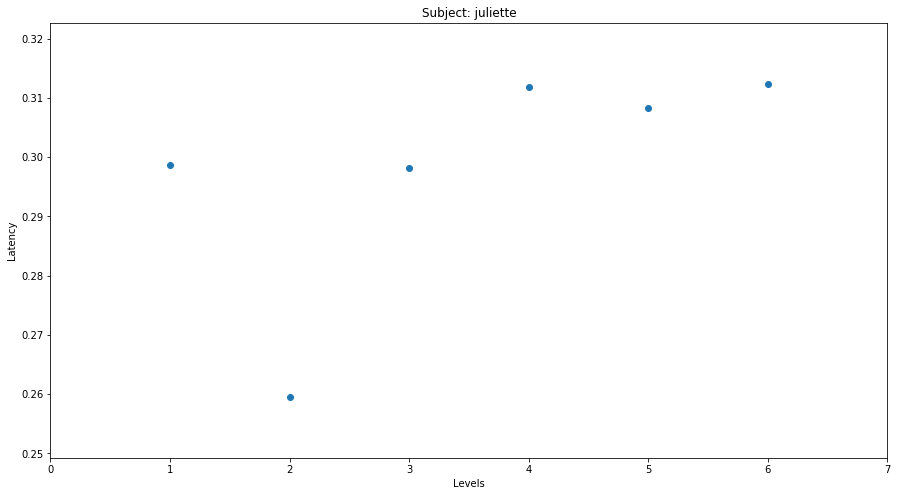

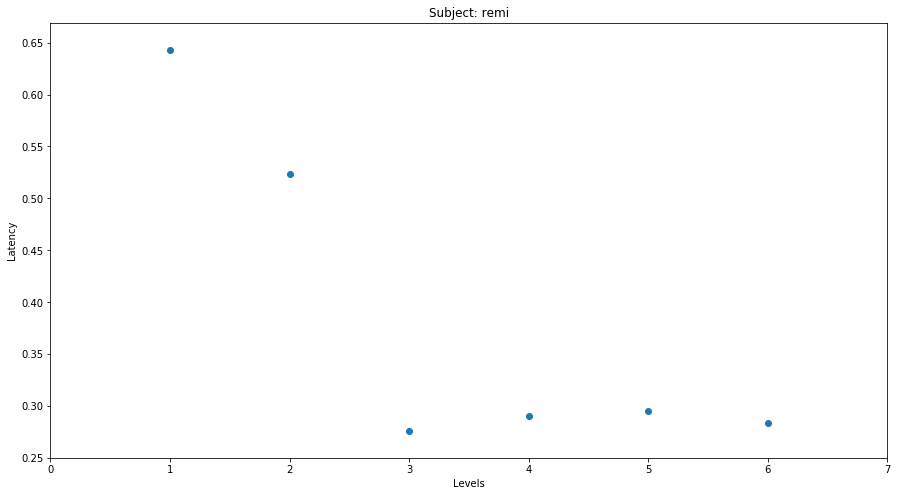

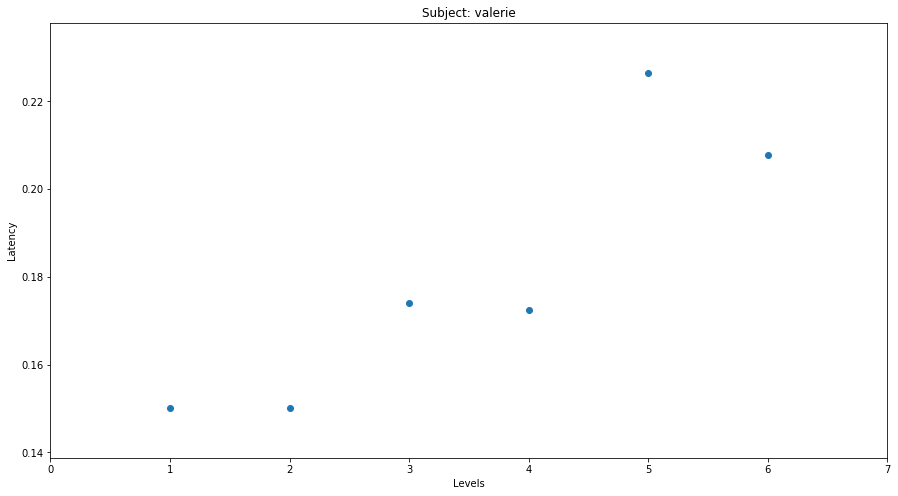

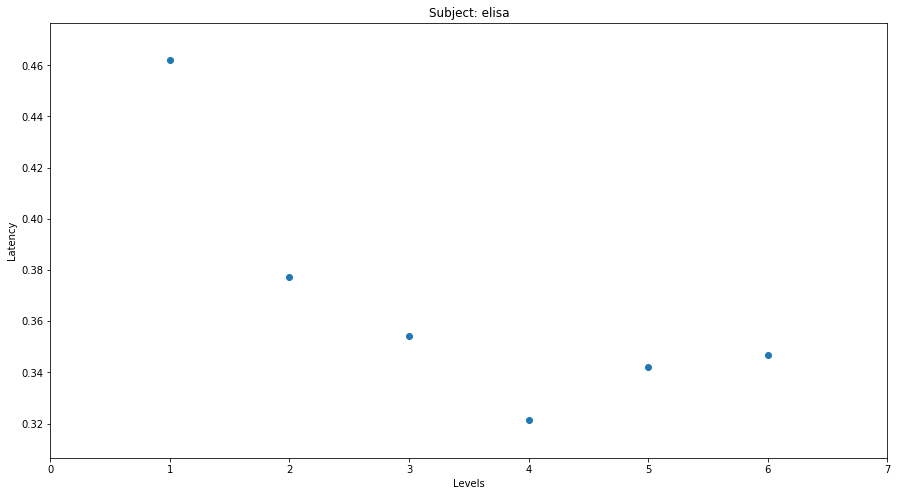

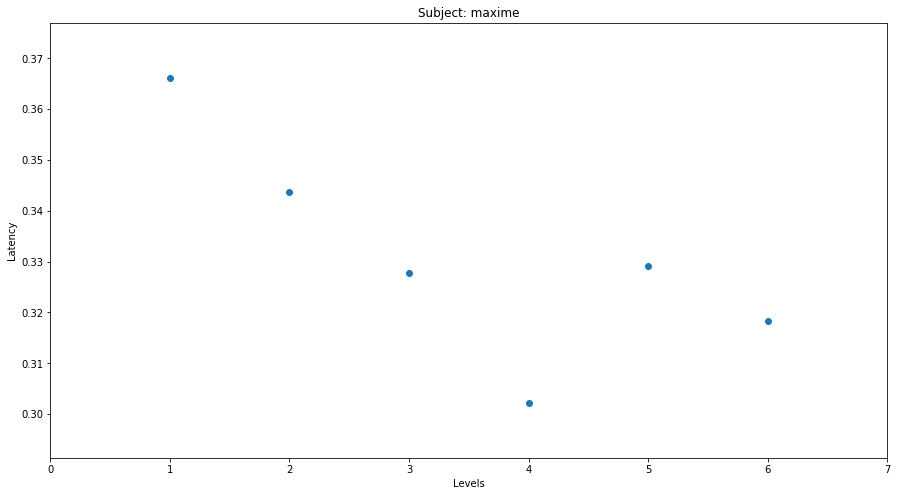

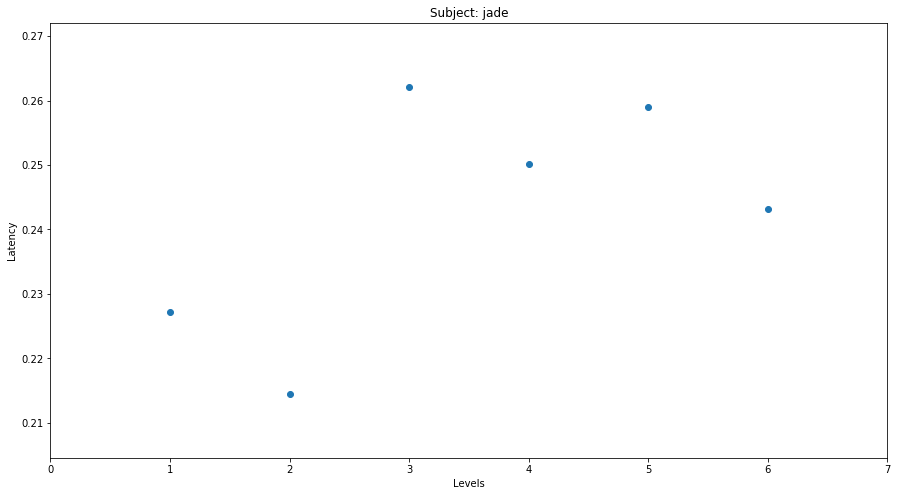

In [63]:
for subj in subjects:
    fig, ax = plt.subplots(figsize=(15,8))
    ax.scatter(lvl[subj], t_mean[subj])
    ax.set_title('Subject: ' + subj)
    ax.set_xlabel('Levels')
    ax.set_ylabel('Latency')
    ax.set_xlim(0, 7)

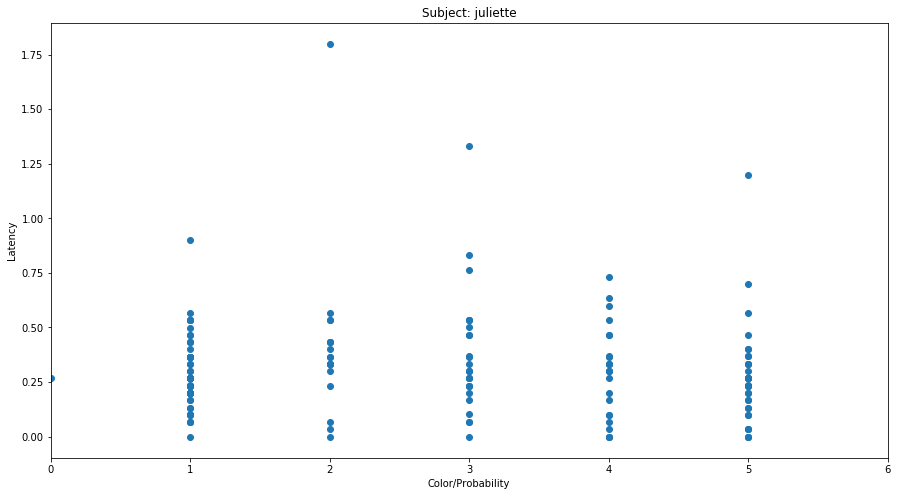

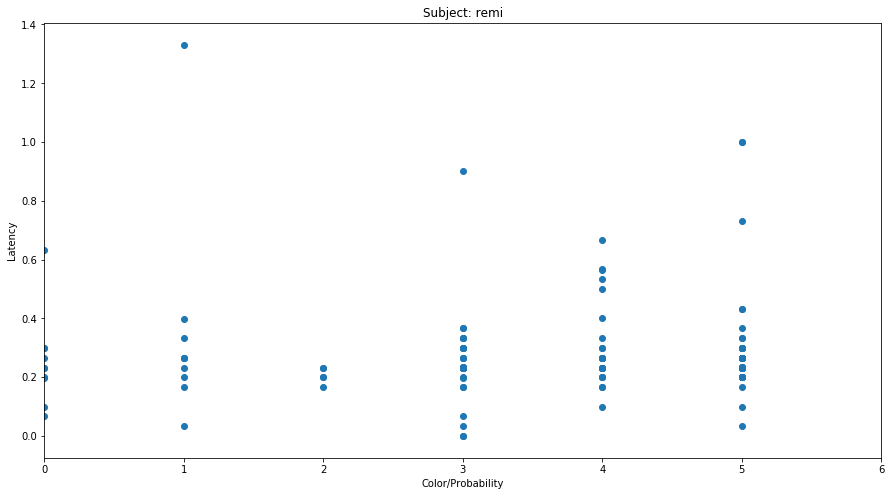

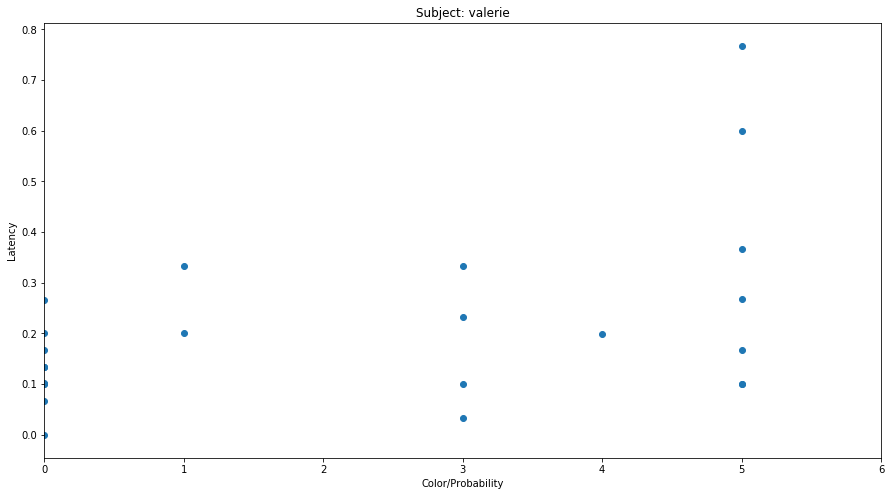

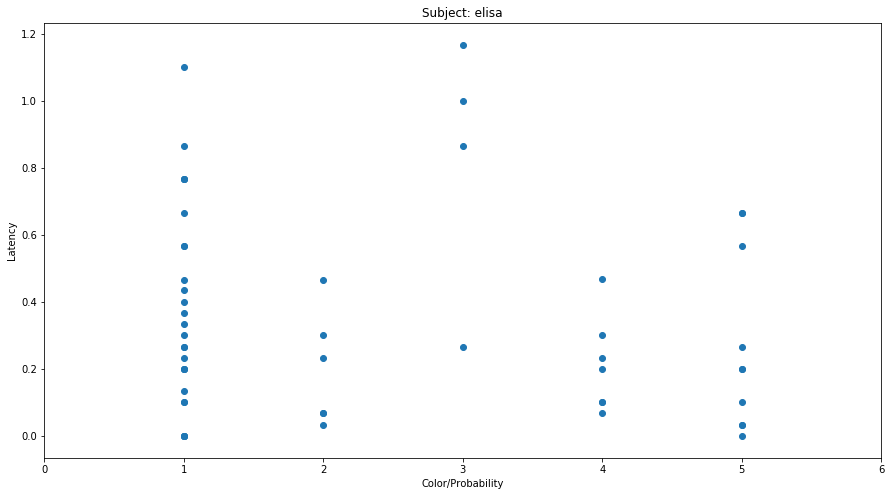

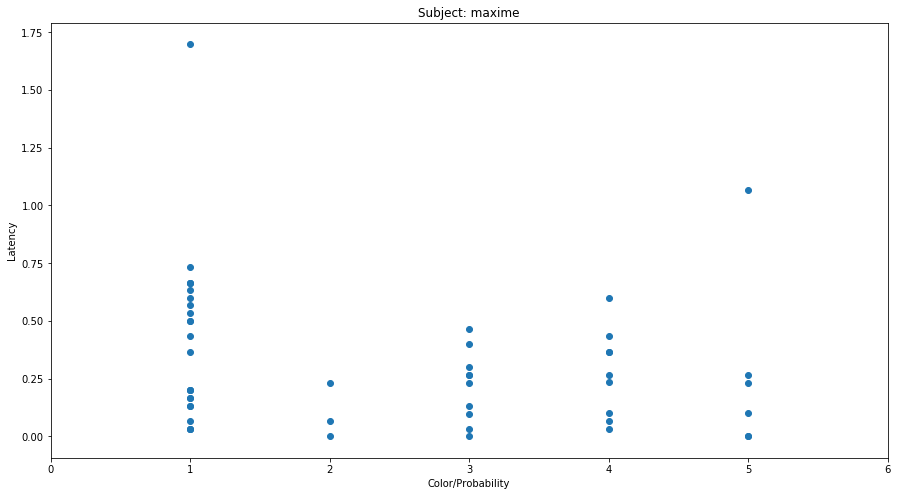

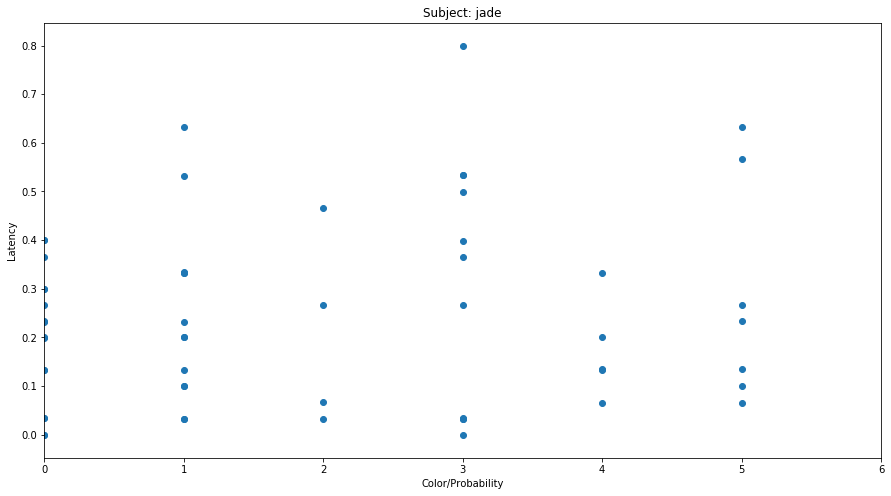

In [64]:
for subj in subjects:
    fig, ax = plt.subplots(figsize=(15,8))
    ax.scatter(p[subj], t_sacc[subj])
    ax.set_title('Subject: ' + subj)
    ax.set_xlabel('Color/Probability')
    ax.set_ylabel('Latency')
    ax.set_xlim(0, 6)

distribution des latences pour chaque niveau de p (+ paddle) - au debut pour chaque sujet


In [45]:
len(p['juliette'])

166

In [46]:
len(t_sacc['juliette'])

191

In [ ]:
lvls_mono[3][x][y]